# LELEC2870 Final Project : classification

In [453]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as linear_model
import sklearn.decomposition as decomposition
import sklearn.discriminant_analysis as discriminant_analysis
from sklearn.ensemble import VotingClassifier
from statistics import median, mean
from math import sqrt
import statsmodels.api as sm
from project_functions import *

## Introduction

The goal of the project is to apply what we saw during LELEC2870 to a real-life situation. In this notebook, we will apply machine learning to predict the class to which an article will belong according to the number of shares it will have.

Let's begin by loading our data sets. The data set X1 contains all articles with their own set of attributes. Y1 is the number of shares linked to each article. Finally, X2 is a data set similar to X1 on which we will make our predictions.

In [584]:
X1 = pd.read_csv('X1.csv')
X2 = pd.read_csv('X2.csv')
Y1 = pd.read_csv('Y1.csv', header=None, names=['shares'])

## EDA (Exploratory Data Analysis)

### Dataset description

Let's check what we have here !

In [585]:
print("Description of the dataset X1: \n")
X1.info()
print("\n Description of the dataset Y1: \n")
Y1.info()

Description of the dataset X1: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19822 entries, 0 to 19821
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 19822 non-null  float64
 1   n_tokens_content               19822 non-null  float64
 2   n_unique_tokens                19822 non-null  float64
 3   n_non_stop_words               19822 non-null  float64
 4   n_non_stop_unique_tokens       19822 non-null  float64
 5   num_hrefs                      19822 non-null  float64
 6   num_self_hrefs                 19822 non-null  float64
 7   num_imgs                       19822 non-null  float64
 8   num_videos                     19822 non-null  float64
 9   average_token_length           19822 non-null  float64
 10  num_keywords                   19822 non-null  float64
 11  data_channel_is_lifestyle      19822 non-null  float64
 12  data_channel_

### Basic statistics

Let's perform some basic statistics to have a better understanding of our data.

In [586]:
X1.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,...,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000
mean,10.411512,549.140046,0.530362,0.970588,0.673084,10.885481,3.310816,4.565533,1.247150,4.546683,...,0.353781,0.095195,0.758606,-0.260299,-0.523224,-0.107931,0.284106,0.072923,0.340922,0.156732
std,2.113789,474.327394,0.136488,0.168962,0.153209,11.103105,3.955175,8.327683,4.002838,0.838940,...,0.104390,0.070253,0.247975,0.128335,0.289211,0.096900,0.324519,0.264179,0.188922,0.224817
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,247.000000,0.470127,1.000000,0.625000,4.000000,1.000000,1.000000,0.000000,4.475899,...,0.306400,0.050000,0.600000,-0.327976,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,413.000000,0.539007,1.000000,0.690351,7.000000,3.000000,1.000000,0.000000,4.661765,...,0.358333,0.100000,0.800000,-0.253332,-0.500000,-0.100000,0.166667,0.000000,0.500000,0.006981
75%,12.000000,719.000000,0.608575,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,4.849668,...,0.410540,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,19.000000,8474.000000,1.000000,1.000000,1.000000,171.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


The standard deviation is very high. We will not expect a normal distribution for the number of shares. 

In [587]:
Y1.describe()

,shares
count,19822.00000
mean,3430.66850
std,11789.36858
min,1.00000
25%,949.00000
50%,1400.00000
75%,2800.00000
max,843300.00000


Can we spot some interesting patterns with a histogram view of each attributes ?

We can see here that these attributes have very different scales. We have so nice normal distrubutions but some are 'tail heavy', which means thaht the extend much farther to the right of the median than to the left.

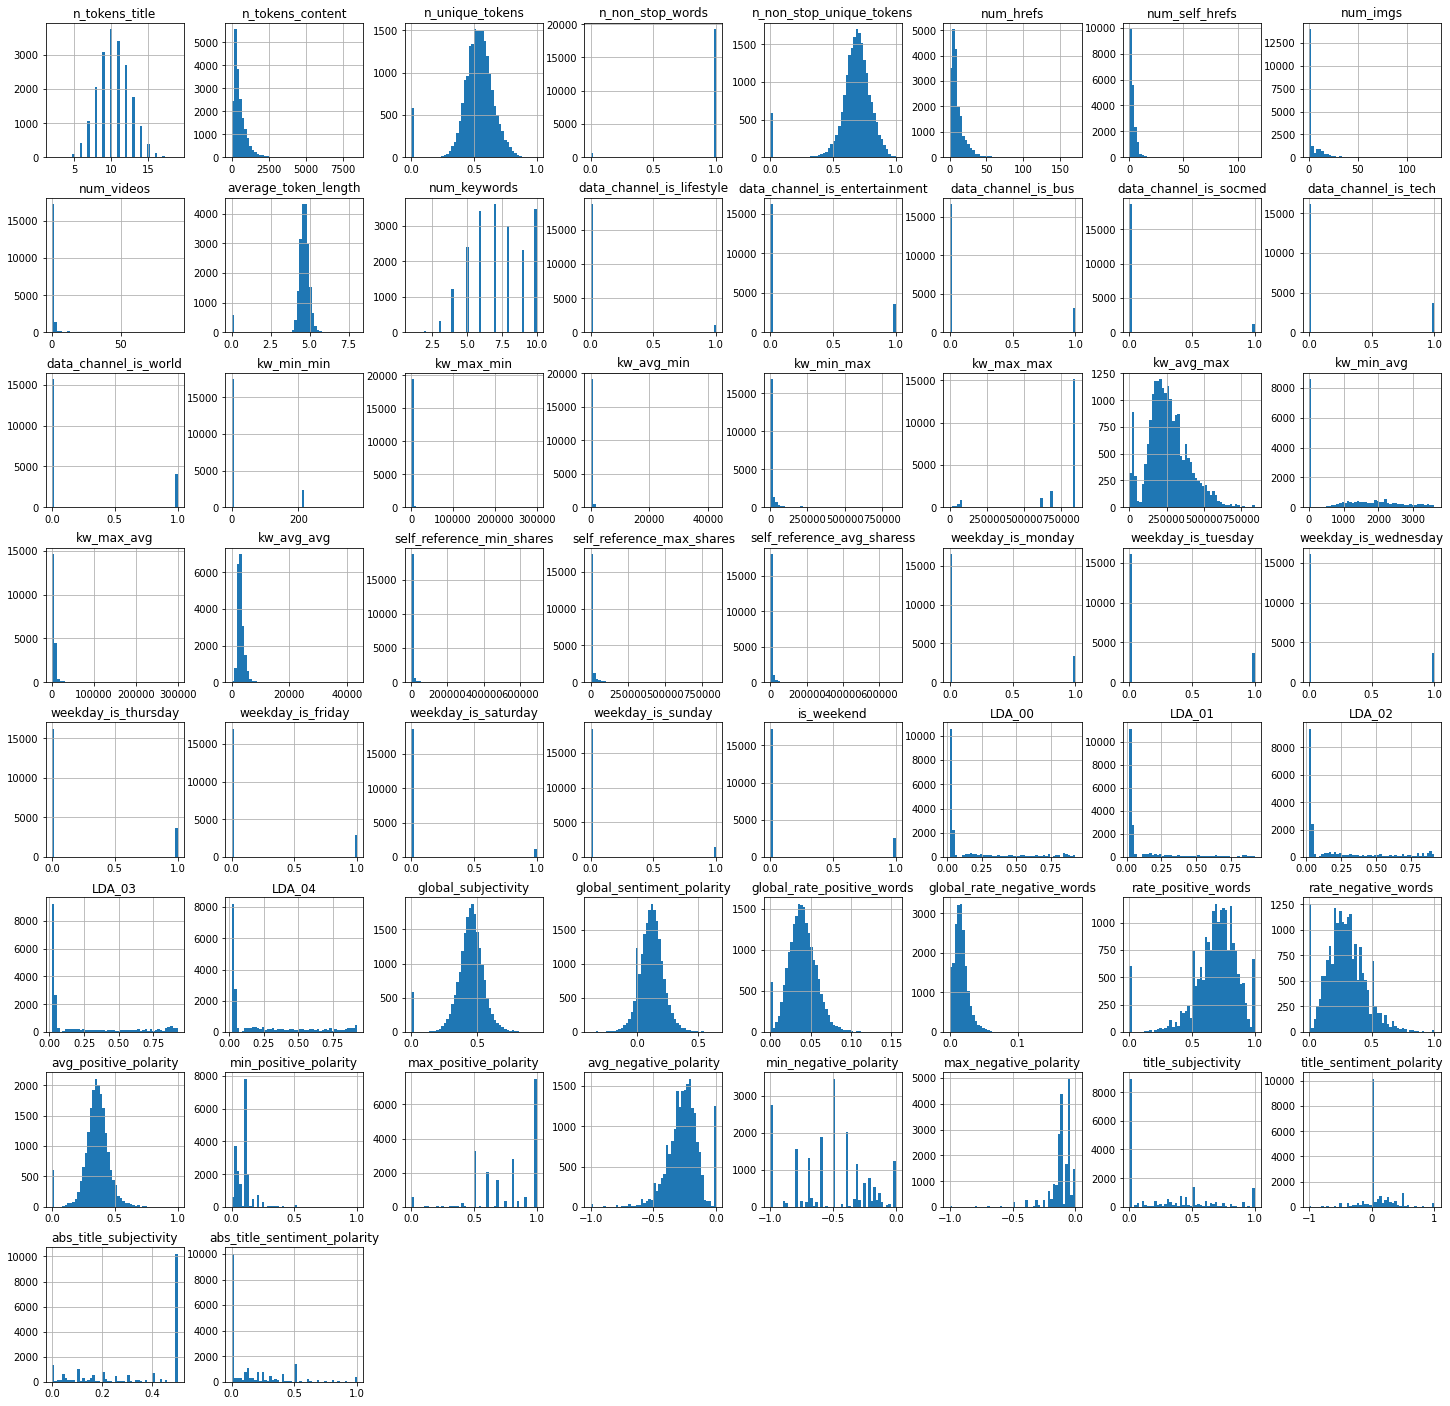

In [588]:
%matplotlib inline
X1.hist(bins=50, figsize=(25,25))
plt.show()

Let's take a look at the correlation between the number of shares for each features. We can not say a lot of thing but the sign of the coef tell us if the feature hase a positive effect on the number of share or not. These data are to be taken with tweezers and do not represent a true statistical analysis. It is purely to give a first overview of our dataset and the influence of features on the number of shares. 

In [589]:
mod = sm.OLS(Y1['shares'], X1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.418
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           5.82e-65
Time:                        16:43:48   Log-Likelihood:            -2.1373e+05
No. Observations:               19822   AIC:                         4.276e+05
Df Residuals:                   19766   BIC:                         4.280e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title

The vast majority of our articles have a number of shares between 0 and 1400 (1400 beeing the median). This could be a problem for our regression algorithms and our classification algorithms. We will see later if it is the case.

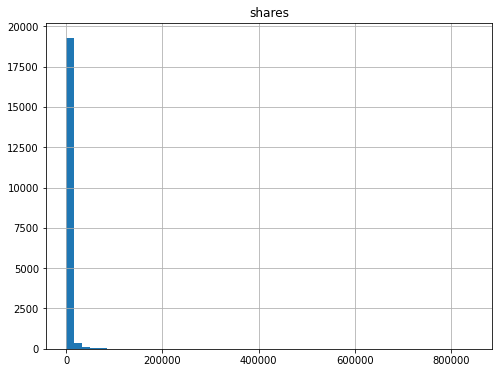

In [590]:
Y1.hist(bins=50, figsize=(8,6))
plt.show()

## Preparing the data

### Labeling

We want to assign for each label/category based on the number of shares. We decided to use two set of label/category and then compare the performance. In the first case, we devide in only two labels: 'unpopular' and 'popular'. In the second situation, we have defined 5 labels: 'flop', 'mild success', 'success', 'great success' and 'viral hit'. 

In [615]:
# Subdivision in 2 categories
catdiv2 = {
    'popular' : pd.Interval(left=1400, right=math.inf),
    'unpopular' : pd.Interval(left=0, right=1400)
}
# Subdivisions in 5 categories
catdiv5 = {
    'flop' : pd.Interval(left=0, right=500),
    'mild_success' : pd.Interval(left=500, right=1400),
    'success' : pd.Interval(left=1400, right=5000),
    'great_success' : pd.Interval(left=5000, right=10000),
    'viral_hit' : pd.Interval(left=10000, right=math.inf)
}

# We add two columns in our data set Y1 in order to add two labels for each article
Y1[['cat_2', 'cat_5']] = '', ''

# We give a lable for each number of shares with a complex one-liner
for i in range(len(Y1)):
    Y1.iloc[i, 1] = [key for key, val in catdiv2.items() if Y1.iloc[i, 0] in val]
    Y1.iloc[i, 2] = [key for key, val in catdiv5.items() if Y1.iloc[i, 0] in val]

In [592]:
Y1.head(10)

,shares,cat_2,cat_5
0,1200,unpopular,mild_success
1,2500,popular,success
2,1500,popular,success
3,1800,popular,success
4,542,unpopular,mild_success
5,6500,popular,great_success
6,6400,popular,great_success
7,4600,popular,success
8,603,unpopular,mild_success
9,1700,popular,success


It is funny to see that we have more viral hit than flop ! The strange thing is that we don't have the same number of popular and unpopular articles while the separation is at the median. This is probably due to the fact that in the definition of our intervals, the value of the median (1400) itself is counted in 'unpopular'.

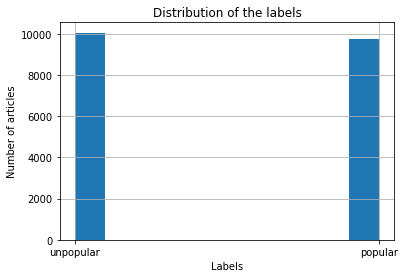

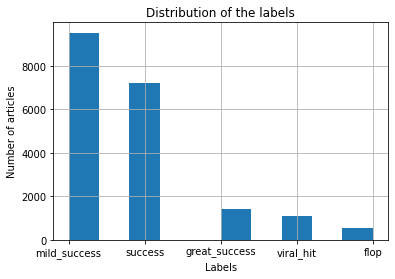

In [622]:
Y1['cat_2'].hist() #, figsize=(10,10))
plt.title('Distribution of the labels')
plt.xlabel('Labels')
plt.ylabel('Number of articles')
plt.show()
Y1['cat_5'].hist()
plt.title('Distribution of the labels')
plt.xlabel('Labels')
plt.ylabel('Number of articles')
plt.show()

### Scaling

Since different features have different ranges of values, some features may affect the prediction more than others. Therefore, a common practice is to standardize and normalize the data. Our estimator scales and translates each feature individually such taht it is in the given range on the training set, i.e. between zero and one.

In [594]:
# We store the names of the columns because we will lost them during de scaling
col_names1 = X1.columns
col_names2 = X2.columns

scaler1 = MinMaxScaler()
scaler1.fit(X1)
X1 = scaler1.transform(X1)
X1 = pd.DataFrame(X1)

scaler2 = MinMaxScaler()
scaler2.fit(X2)
X2 = scaler2.transform(X2)
X2 = pd.DataFrame(X2)
X2.columns = col_names


X1.columns = col_names
X1.head(10)

# !!! WARNING : Don't forget to relaod the dataset if you want the original dataset or if you re-run this cell

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.470588,0.044725,0.521622,1.0,0.697248,0.029240,0.017241,0.007812,0.000000,0.513167,...,0.368452,0.100000,0.5,0.755556,0.500000,0.950000,0.227273,0.534091,0.545455,0.068182
1,0.588235,0.047439,0.502660,1.0,0.645299,0.070175,0.086207,0.007812,0.000000,0.564235,...,0.270170,0.100000,0.5,0.840741,0.833333,0.844444,0.500000,0.750000,0.000000,0.500000
2,0.529412,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010989,0.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.000000
3,0.411765,0.030210,0.619608,1.0,0.792208,0.011696,0.000000,0.000000,0.010989,0.577568,...,0.245130,0.100000,1.0,0.500000,0.500000,0.500000,0.200000,0.550000,0.600000,0.100000
4,0.588235,0.031626,0.591603,1.0,0.740260,0.005848,0.008621,0.007812,0.010989,0.580939,...,0.539076,0.200000,1.0,0.745833,0.500000,0.950000,0.000000,0.500000,1.000000,0.000000
5,0.529412,0.030092,0.638211,1.0,0.761006,0.046784,0.034483,0.007812,0.000000,0.587635,...,0.215714,0.100000,0.3,0.872381,0.700000,0.950000,0.900000,0.600000,0.800000,0.200000
6,0.352941,0.018409,0.664516,1.0,0.741935,0.029240,0.025862,0.007812,0.000000,0.577929,...,0.383939,0.033333,1.0,0.864286,0.800000,0.928571,0.000000,0.500000,1.000000,0.000000
7,0.529412,0.091810,0.527132,1.0,0.708595,0.058480,0.051724,0.007812,0.000000,0.589165,...,0.378026,0.100000,1.0,0.737817,0.400000,0.950000,0.321429,0.553571,0.357143,0.107143
8,0.588235,0.030918,0.600000,1.0,0.717791,0.040936,0.034483,0.007812,0.010989,0.603736,...,0.378205,0.100000,0.8,0.675000,0.600000,0.875000,0.000000,0.500000,1.000000,0.000000
9,0.647059,0.011683,0.717172,1.0,0.836066,0.011696,0.008621,0.000000,0.010989,0.633077,...,0.307273,0.100000,0.6,0.916667,0.900000,0.950000,0.000000,0.500000,1.000000,0.000000


Here we create a training set and a test set. We chose to separate the set by taking 70% of the data to train our models and 30% to test them.

### Feature engineering

The goal here is to reduce the number of features taken into account. A simple way to see the importance of a feature is to compute the correlation coefficient related to the number of shares obtainend by an article for each features.

In [595]:
df = X1.copy()
df['shares'] = Y1['shares']

corr_matrix = df.corr()
corr_coef = np.abs(corr_matrix['shares']).sort_values(ascending=False)

# The 10 more correlated features (positively or negatively)
corr_coef.head(11)

shares                   1.000000
kw_avg_avg               0.108068
LDA_03                   0.089226
kw_max_avg               0.071212
LDA_02                   0.056405
num_imgs                 0.049626
num_hrefs                0.048483
data_channel_is_world    0.047275
kw_avg_max               0.040903
kw_max_min               0.039898
global_subjectivity      0.039386
Name: shares, dtype: float64

Here we estimate mutual information for our target variable. Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

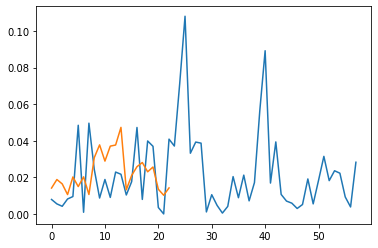

In [596]:
n_samples, n_feats = X1.shape
corr_vec = np.corrcoef(X1,Y1['shares'], rowvar=False)[-1, :n_feats]
most_corr = np.argsort(np.abs(corr_vec))
MI = mutual_info_regression(X1,Y1['shares'])
most_MI = np.argsort(np.abs(MI))

plt.plot(np.abs(corr_vec))
plt.plot(MI[MI>0.01])
plt.show()

Because we are ML enthusiats, we will use a different model for dimensionality reduction: Single Value Decomposition. Seasoned kagglers use SVD for improving the model accuracy by appending the SVD components with the features. We appended 10 SVD components into the 58 features. This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [597]:
svd = TruncatedSVD(n_components=10)
arr = svd.fit_transform(X1)
arr = pd.DataFrame(arr)
X1_SVD = pd.concat([X1, arr], axis=1)

In [598]:
X1_SVD.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,0,1,2,3,4,5,6,7,8,9
0,0.470588,0.044725,0.521622,1.0,0.697248,0.029240,0.017241,0.007812,0.000000,0.513167,...,2.837321,-0.208833,1.010530,-0.304254,0.066655,-0.312379,-0.205275,0.818621,-0.301803,0.088993
1,0.588235,0.047439,0.502660,1.0,0.645299,0.070175,0.086207,0.007812,0.000000,0.564235,...,2.924709,-0.380068,0.910547,-0.596421,0.378115,-0.616354,-0.601887,-0.606495,-0.189432,0.271795
2,0.529412,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010989,0.000000,...,1.963618,-0.020699,-0.237568,0.025340,-0.535898,0.069364,-0.148025,0.870040,-0.668566,1.540598
3,0.411765,0.030210,0.619608,1.0,0.792208,0.011696,0.000000,0.000000,0.010989,0.577568,...,2.763081,-0.443755,-0.066570,0.927422,0.788054,1.084795,-0.140713,-0.148476,-0.017353,-0.600731
4,0.588235,0.031626,0.591603,1.0,0.740260,0.005848,0.008621,0.007812,0.010989,0.580939,...,3.146099,-0.381017,-0.320142,-0.146962,-0.706906,0.182367,0.083767,0.170650,0.871117,-0.302042
5,0.529412,0.030092,0.638211,1.0,0.761006,0.046784,0.034483,0.007812,0.000000,0.587635,...,2.922476,-0.249361,0.782889,-0.378335,0.094111,-0.298047,-0.007278,0.099709,0.894359,0.257293
6,0.352941,0.018409,0.664516,1.0,0.741935,0.029240,0.025862,0.007812,0.000000,0.577929,...,3.007297,-0.199934,0.041345,0.706676,-0.295758,0.077419,0.745094,-0.202744,-0.338940,0.045953
7,0.529412,0.091810,0.527132,1.0,0.708595,0.058480,0.051724,0.007812,0.000000,0.589165,...,3.042731,-0.191439,0.884449,-0.650739,0.742913,0.744834,-0.013905,-0.037609,-0.037072,-0.153138
8,0.588235,0.030918,0.600000,1.0,0.717791,0.040936,0.034483,0.007812,0.010989,0.603736,...,3.055770,-0.340482,-0.590222,-0.231289,-0.717771,0.010787,-0.095403,0.881323,-0.334026,-0.227674
9,0.647059,0.011683,0.717172,1.0,0.836066,0.011696,0.008621,0.000000,0.010989,0.633077,...,3.102758,-0.092763,0.335129,-0.190212,0.188703,1.188769,0.029258,0.023132,-0.167690,0.108911


### Dimensionality reduction with PCA

In [599]:
# Max # of features = 40
X1_PCA = X1.copy()
X1_SVD_PCA = X1_SVD.copy()

pca = decomposition.TruncatedSVD(n_components=40)
fa = decomposition.FactorAnalysis()

X1_PCA = pca.fit_transform(X1_PCA)
X1_SVD_PCA = pca.fit_transform(X1_SVD_PCA)

X1_PCA.shape

(19822, 40)

### Training and testing set

Here we create a training set and a test set. We chose to separate the set by taking 70% of the data to train our models and 30% to test them.

In [600]:
# We add a random state to have avery time the same output when we run the notebook
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=42)
Y1_train_lab2 = Y1_train['cat_2']
Y1_train_lab5 = Y1_train['cat_5']
Y1_test_lab2 = Y1_test['cat_2']
Y1_test_lab5 = Y1_test['cat_5']

X1_PCA_train, X1_PCA_test, Y1_train, Y1_test = train_test_split(X1_PCA, Y1, test_size=0.30, random_state=42)
Y1_PCA_train_lab2 = Y1_train['cat_2']
Y1_PCA_train_lab5 = Y1_train['cat_5']
Y1_PCA_test_lab2 = Y1_test['cat_2']
Y1_PCA_test_lab5 = Y1_test['cat_5']

X1_SVD_train, X1_SVD_test, Y1_train, Y1_test = train_test_split(X1_SVD, Y1, test_size=0.30, random_state=42)
Y1_SVD_train_lab2 = Y1_train['cat_2']
Y1_SVD_train_lab5 = Y1_train['cat_5']
Y1_SVD_test_lab2 = Y1_test['cat_2']
Y1_SVD_test_lab5 = Y1_test['cat_5']
Y1_SVD_test_value = Y1_test['shares']

X1_SVD_PCA_train, X1_SVD_PCA_test, Y1_train, Y1_test = train_test_split(X1_SVD_PCA, Y1, test_size=0.30, random_state=42)
Y1_SVD_PCA_train_lab2 = Y1_train['cat_2']
Y1_SVD_PCA_train_lab5 = Y1_train['cat_5']
Y1_SVD_PCA_test_lab2 = Y1_test['cat_2']
Y1_SVD_PCA_test_lab5 = Y1_test['cat_5']



## Train and test our models

We will test different model to see the difference in term of performance. You can go at the end to visualize our results. WARNING : running a cell take a lot of time due to the multiple iration.

### Classification with our initialdata set

Classifier implementing the k-nearest neighbors vote.

In [520]:
# 2 Labels
precision_knn = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_train, Y1_train_lab2)
    y_pred = neigh.predict(X1_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_knn.append(precision)

precision_knn_2 = np.mean(precision_knn)
print('Precision with the k-nearest neighbors vote with 2 labels: ')
print(str(precision_knn_2 * 100)+'%')


# 5 Labels
precision_knn = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_train, Y1_train_lab5)
    y_pred = neigh.predict(X1_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
            
    precision = count/len(Y_pred)
    precision_knn.append(precision)

precision_knn_5 = np.mean(precision_knn)
print('Precision with the k-nearest neighbors vote with 5 lables: ')
print(str(precision_knn_5 * 100)+'%')

Precision with the k-nearest neighbors vote with 2 labels: 
59.105431309904155%
Precision with the k-nearest neighbors vote with 5 lables: 
45.670085757524795%


Random Forest Classifier.

In [521]:
# 2 Labels
precision_rfc = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_train, Y1_train_lab2)
    y_pred = rf.predict(X1_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
    
    precision = count/len(Y_pred)
    precision_rfc.append(precision)

precision_rfc_2 = np.mean(precision_rfc)
print('Precision with the random forest classifier with 2 labels: ')
print(str(precision_rfc_2 * 100)+'%')


# 5 Labels
precision_rfc = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_train, Y1_train_lab5)
    y_pred = rf.predict(X1_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc.append(precision)

precision_rfc_5 = np.mean(precision_rfc)
print('Precision with the random forest classifier with 5 labels: ')
print(str(precision_rfc_5 * 100)+'%')

Precision with the random forest classifier with 2 labels: 
65.31192197746762%
Precision with the random forest classifier with 5 labels: 
54.34336640322852%


### Classification with our dataset after PCA

Classifier implementing the k-nearest neighbors vote.

In [519]:
# 2 Labels
precision_knn_PCA = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_PCA_train, Y1_PCA_train_lab2)
    y_pred = neigh.predict(X1_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_PCA_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1

    precision = count/len(Y_pred)
    precision_knn_PCA.append(precision)

precision_knn_PCA_2 = np.mean(precision_knn_PCA)
print('Precision with the k-nearest neighbors vote + PCA with 2 labels: ')
print(str(precision_knn_PCA_2 * 100)+'%')


# 5 Labels 
precision_knn_PCA = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_PCA_train, Y1_PCA_train_lab5)
    y_pred = neigh.predict(X1_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_PCA_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
    
    precision = count/len(Y_pred)
    precision_knn_PCA.append(precision)

precision_knn_PCA_5 = np.mean(precision_knn_PCA)
print('Precision with the k-nearest neighbors vote + PCA with 5 labels: ')
print(str(precision_knn_PCA_5 * 100)+'%')

Precision with the k-nearest neighbors vote + PCA with 2 labels: 
59.139061711787456%
Precision with the k-nearest neighbors vote + PCA with 5 labels: 
45.55237935093325%


Random Forest Classifier.

In [522]:
# 2 Labels
precision_rfc_PCA = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_PCA_train, Y1_PCA_train_lab2)
    y_pred = rf.predict(X1_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_PCA_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc_PCA.append(precision)

precision_rfc_PCA_2 = np.mean(precision_rfc_PCA)
print('Precision with the random forest classifier + PCA with 2 labels: ')
print(str(precision_rfc_PCA_2 * 100)+'%')


# 5 Labels
precision_rfc_PCA = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_PCA_train, Y1_PCA_train_lab5)
    y_pred = rf.predict(X1_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_PCA_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc_PCA.append(precision)

precision_rfc_PCA_5 = np.mean(precision_rfc_PCA)
print('Precision with the random forest classifier + PCA with 5 labels: ')
print(str(precision_rfc_PCA_5 * 100)+'%')

Precision with the random forest classifier + PCA with 2 labels: 
63.418530351437695%
Precision with the random forest classifier + PCA with 5 labels: 
53.24365226164453%


### Classification with our dataset after SVD

Classifier implementing the k-nearest neighbors vote.

In [546]:
# 2 Labels
precision_knn_SVD = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_SVD_train, Y1_SVD_train_lab2)
    y_pred = neigh.predict(X1_SVD_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1

    precision = count/len(Y_pred)
    precision_knn_SVD.append(precision)

precision_knn_SVD_2 = np.mean(precision_knn_SVD)
print('Precision with the k-nearest neighbors vote + SVD with 2 labels: ')
print(str(precision_knn_SVD_2 * 100)+'%')


# 5 Labels 
precision_knn_SVD = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_SVD_train, Y1_SVD_train_lab5)
    y_pred = neigh.predict(X1_SVD_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1

    precision = count/len(Y_pred)
    precision_knn_SVD.append(precision)

precision_knn_SVD_5 = np.mean(precision_knn_SVD)
print('Precision with the k-nearest neighbors vote + SVD with 5 labels: ')
print(str(precision_knn_SVD_5 * 100)+'%')

Precision with the k-nearest neighbors vote + SVD with 2 labels: 
58.516899276946354%
Precision with the k-nearest neighbors vote + SVD with 5 labels: 
44.84614091138389%


Random Forest Classifier.

In [601]:
# 2 Labels
precision_rfc_SVD = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_SVD_train, Y1_SVD_train_lab2)
    y_pred = rf.predict(X1_SVD_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc_SVD.append(precision)

precision_rfc_SVD_2 = np.mean(precision_rfc_SVD)
print('Precision with the random forest classifier + SVD with 2 labels: ')
print(str(precision_rfc_SVD_2 * 100)+'%')


# 5 Labels
precision_rfc_SVD = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_SVD_train, Y1_SVD_train_lab5)
    y_pred = rf.predict(X1_SVD_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
    
    Y_pred_max = Y_pred
    precision = count/len(Y_pred)
    precision_rfc_SVD.append(precision)
    
precision_rfc_SVD_5 = np.mean(precision_rfc_SVD)
print('Precision with the random forest classifier + SVD with 5 labels: ')
print(str(precision_rfc_SVD_5 * 100)+'%')

Precision with the random forest classifier + SVD with 2 labels: 
65.32369261812678%
Precision with the random forest classifier + SVD with 5 labels: 
54.80410290902975%


### Classification with our dataset after SVD + PCA

Classifier implementing the k-nearest neighbors vote.

In [526]:
# 2 Labels
precision_knn_SVD_PCA = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_SVD_PCA_train, Y1_SVD_PCA_train_lab2)
    y_pred = neigh.predict(X1_SVD_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_PCA_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1

    precision = count/len(Y_pred)
    precision_knn_SVD_PCA.append(precision)

precision_knn_SVD_PCA_2 = np.mean(precision_knn_SVD_PCA)
print('Precision with the k-nearest neighbors vote + SVD + PCA with 2 labels: ')
print(str(precision_knn_SVD_PCA_2 * 100)+'%')


# 5 Labels
precision_knn_SVD_PCA = []
for i in range(10):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X1_SVD_PCA_train, Y1_SVD_PCA_train_lab5)
    y_pred = neigh.predict(X1_SVD_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_PCA_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1

    precision = count/len(Y_pred)
    precision_knn_SVD_PCA.append(precision)

precision_knn_SVD_PCA_5 = np.mean(precision_knn_SVD_PCA)
print('Precision with the k-nearest neighbors vote + SVD+ PCA with 5 labels: ')
print(str(precision_knn_SVD_PCA_5 * 100)+'%')

Precision with the k-nearest neighbors vote + SVD + PCA with 2 labels: 
58.53371447788802%
Precision with the k-nearest neighbors vote + SVD+ PCA with 5 labels: 
45.01429292080041%


Random Forest Classifier.

In [527]:
# 2 Labels
precision_rfc_SVD_PCA = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_SVD_PCA_train, Y1_SVD_PCA_train_lab2)
    y_pred = rf.predict(X1_SVD_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_PCA_test_lab2)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc_SVD_PCA.append(precision)

precision_rfc_SVD_PCA_2 = np.mean(precision_rfc_SVD_PCA)
print('Precision with the random forest classifier + SVD + PCA with 2 labels: ')
print(str(precision_rfc_SVD_PCA_2 * 100)+'%')


# 5 Labels
precision_rfc_SVD_PCA = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
    rf.fit(X1_SVD_PCA_train, Y1_SVD_PCA_train_lab5)
    y_pred = rf.predict(X1_SVD_PCA_test)

    Y_pred = pd.DataFrame(y_pred)
    Y_test = pd.DataFrame(Y1_SVD_PCA_test_lab5)
    count = 0
    for i in range(len(Y_pred)):
        if Y_pred.iloc[i,0] == Y_test.iloc[i,0]:
            count += 1
        
    precision = count/len(Y_pred)
    precision_rfc_SVD_PCA.append(precision)

precision_rfc_SVD_PCA_5 = np.mean(precision_rfc_SVD_PCA)
print('Precision with the random forest classifier + SVD + PCA with 5 labels: ')
print(str(precision_rfc_SVD_PCA_5 * 100)+'%')

Precision with the random forest classifier + SVD + PCA with 2 labels: 
63.146124096182945%
Precision with the random forest classifier + SVD + PCA with 5 labels: 
53.02505464940306%


## Results

###  2 labels

In [533]:
result_2 = [precision_knn_2, precision_rfc_2]
result_PCA_2 = [precision_knn_PCA_2, precision_rfc_PCA_2]
result_SVD_2 = [precision_knn_SVD_2, precision_rfc_SVD_2]
result_SVD_PCA_2 = [precision_knn_SVD_PCA_2, precision_rfc_SVD_PCA_2]

result_knn_2 = [precision_knn_2, precision_knn_PCA_2, precision_knn_SVD_2, precision_knn_SVD_PCA_2]
result_rfc_2 = [precision_rfc_2, precision_rfc_PCA_2, precision_rfc_SVD_2, precision_rfc_SVD_PCA_2]

results2 = pd.DataFrame()
results2['Dataset'] = ['Initial', 'PCA', 'SVD', 'SVD + PCA']
results2['KNN'] = result_knn_2
results2['RFC'] = result_rfc_2
results2

,Dataset,KNN,RFC
0,Initial,0.591054,0.653119
1,PCA,0.591391,0.634185
2,SVD,0.585169,0.654851
3,SVD + PCA,0.585337,0.631461


### 5 labels

In [534]:
result_5 = [precision_knn_5, precision_rfc_5]
result_PCA_5 = [precision_knn_PCA_5, precision_rfc_PCA_5]
result_SVD_5 = [precision_knn_SVD_5, precision_rfc_SVD_5]
result_SVD_PCA_5 = [precision_knn_SVD_PCA_5, precision_rfc_SVD_PCA_5]

result_knn_5 = [precision_knn_5, precision_knn_PCA_5, precision_knn_SVD_5, precision_knn_SVD_PCA_5]
result_rfc_5 = [precision_rfc_5, precision_rfc_PCA_5, precision_rfc_SVD_5, precision_rfc_SVD_PCA_5]

results5 = pd.DataFrame()
results5['Dataset'] = ['Initial', 'PCA', 'SVD', 'SVD + PCA']
results5['KNN'] = result_knn_5
results5['RFC'] = result_rfc_5
results5

,Dataset,KNN,RFC
0,Initial,0.456701,0.543434
1,PCA,0.455524,0.532437
2,SVD,0.448461,0.547402
3,SVD + PCA,0.450143,0.530251


### F1 score for 5 labels

In [535]:
def score_f1 (y_true , y_pred ,th ) :
    return sklearn.metrics.f1_score(y_true>th , y_pred>th )
def score_regression(y_true,y_pred):
    scores=[score_f1(y_true,y_pred,th=th) for th in [500,1400,5000,10000]]
    return np.mean(scores)

In [612]:
resultat = Y_pred_max
Y_true = np.array(Y1_SVD_test_value.values.tolist())
essai = []
resultat.shape
for i in range(Y_true.shape[0]):
    if resultat.iloc[i,0] == 'flop':
        essai.append(250)
    if resultat.iloc[i,0] == 'mild_success':
        essai.append(1000)
    if resultat.iloc[i,0] == 'success':
        essai.append(2500)
    if resultat.iloc[i,0] == 'great_success':
        essai.append(7500)
    if resultat.iloc[i,0] == 'viral_hit' :
        essai.append(11000)
  
essai = np.array(essai)
print(score_regression(Y_true, essai))

0.3948384705955878
